In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        'C:/Users/Xhensil/Downloads/archive(2)/chest_xray/train',
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'C:/Users/Xhensil/Downloads/archive(2)/chest_xray/val',
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'C:/Users/Xhensil/Downloads/archive(2)/chest_xray/chest_xray/test',
        batch_size=batch_size,

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [51]:
xx_test=np.concatenate([test.next()[0] for i in range(test.__len__())])
xx_test.shape
yy_test=np.concatenate([test.next()[1] for i in range(test.__len__())])
np.unique(yy_test, return_counts= True)

(array([0., 1.], dtype=float32), array([234, 390]))

(-0.5, 1127.5, 519.5, -0.5)

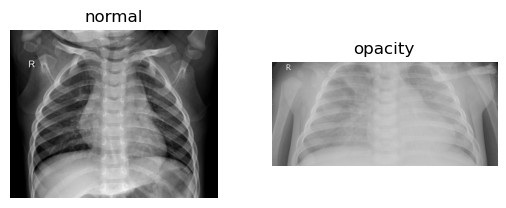

In [3]:
img = cv2.imread("C:/Users/Xhensil/Downloads/archive(2)/chest_xray/train/NORMAL/IM-0117-0001.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 1)
plt.title('normal')
plt.imshow(img)
plt.axis("off")

img = cv2.imread("C:/Users/Xhensil/Downloads/archive(2)/chest_xray/train/PNEUMONIA/person1011_bacteria_2942.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 2)
plt.title('opacity')
plt.imshow(img)
plt.axis("off")

# Convolutional Neural Network

## Baseline Model

In [4]:
model_CNN = models.Sequential()
model_CNN.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dropout(0.35))
model_CNN.add(layers.Dense(512, activation='relu'))
model_CNN.add(layers.Dropout(0.25))
model_CNN.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
from tensorflow.keras import optimizers

model_CNN.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [7]:
history_CNN = model_CNN.fit(train_generator, epochs = 15, batch_size= 32, validation_data=(validation_generator))

Epoch 1/15
210/210 [==============================] - 118s 519ms/step - loss: 0.2852 - acc: 0.8752 - val_loss: 0.1318 - val_acc: 0.9510
Epoch 2/15
210/210 [==============================] - 69s 329ms/step - loss: 0.1151 - acc: 0.9561 - val_loss: 0.1080 - val_acc: 0.9529
Epoch 3/15
210/210 [==============================] - 69s 328ms/step - loss: 0.0872 - acc: 0.9680 - val_loss: 0.0853 - val_acc: 0.9683
Epoch 4/15
210/210 [==============================] - 71s 336ms/step - loss: 0.0741 - acc: 0.9728 - val_loss: 0.0781 - val_acc: 0.9731
Epoch 5/15
210/210 [==============================] - 69s 331ms/step - loss: 0.0717 - acc: 0.9723 - val_loss: 0.0663 - val_acc: 0.9731
Epoch 6/15
210/210 [==============================] - 71s 338ms/step - loss: 0.0684 - acc: 0.9716 - val_loss: 0.0606 - val_acc: 0.9769
Epoch 7/15
210/210 [==============================] - 72s 340ms/step - loss: 0.0629 - acc: 0.9757 - val_loss: 0.0736 - val_acc: 0.9731
Epoch 8/15
210/210 [==============================] - 

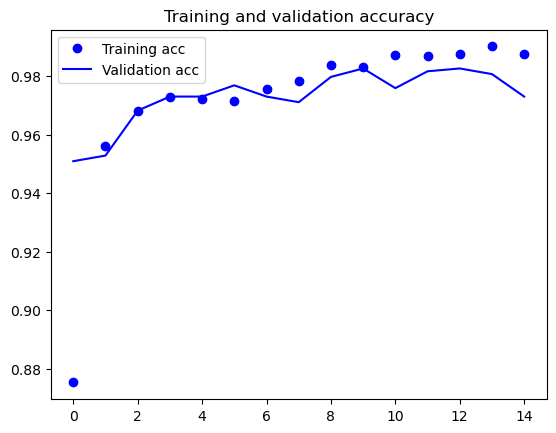

In [8]:
import matplotlib.pyplot as plt

acc = history_CNN.history['acc']
val_acc = history_CNN.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

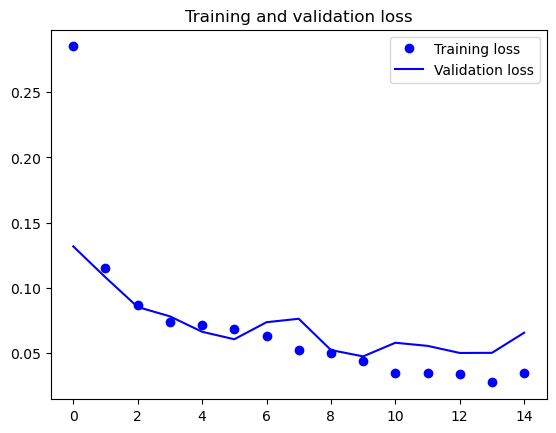

In [9]:
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_loss, test_acc = model_CNN.evaluate(test_generator)

32/32 [==============================] - 11s 335ms/step - loss: 1.4924 - acc: 0.7564


# Data Augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

batch_size = 32
datagen = ImageDataGenerator(rescale = 1/255,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.05,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')


train = datagen.flow_from_directory('C:/Users/Xhensil/Downloads/archive(2)/chest_xray/train', batch_size=batch_size, class_mode='binary')
val_gen = ImageDataGenerator(rescale = 1/255)
val = val_gen.flow_from_directory('C:/Users/Xhensil/Downloads/archive(2)/chest_xray/val', batch_size=batch_size, class_mode='binary')
test_gen = ImageDataGenerator(rescale = 1/255)
test = test_gen.flow_from_directory('C:/Users/Xhensil/Downloads/archive(2)/chest_xray/test', batch_size=batch_size, class_mode='binary')

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
xx_test=np.concatenate([test.next()[0] for i in range(test.__len__())])
xx_test.shape
yy_test=np.concatenate([test.next()[1] for i in range(test.__len__())])
yy_test.shape
xx_test.shape

(624, 256, 256, 3)

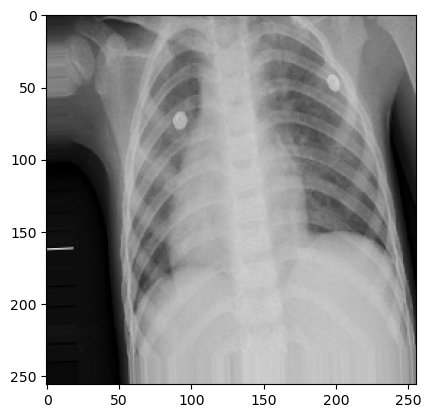

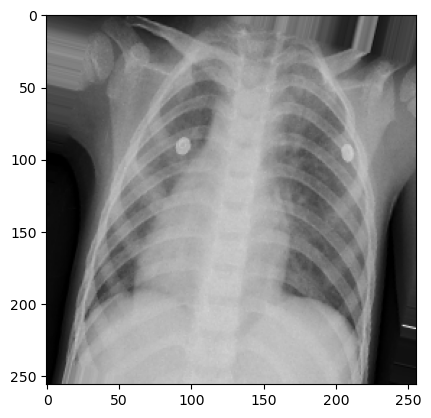

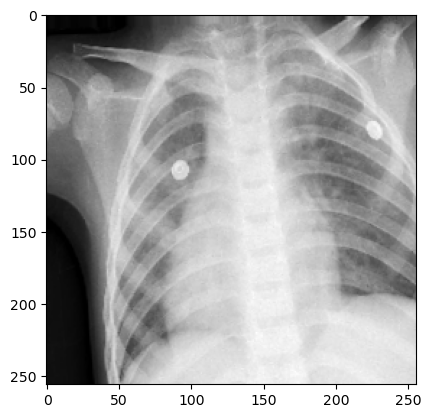

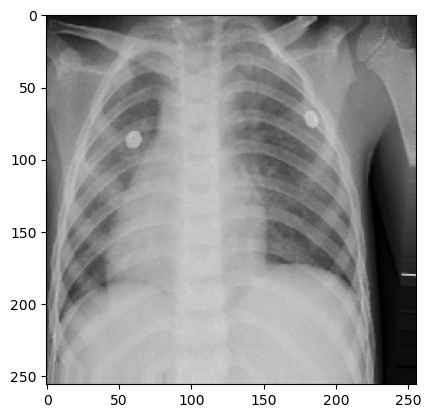

In [13]:
from tensorflow.keras.preprocessing import image

img = xx_test[0]

x = np.reshape(img,(256,256,3))

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

## Baseline Model

In [14]:
model_DA = models.Sequential()
model_DA.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model_DA.add(layers.MaxPooling2D((2, 2)))
model_DA.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_DA.add(layers.MaxPooling2D((2, 2)))
model_DA.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_DA.add(layers.MaxPooling2D((2, 2)))
model_DA.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_DA.add(layers.MaxPooling2D((2, 2)))
model_DA.add(layers.Flatten())
model_DA.add(layers.Dropout(0.35))
model_DA.add(layers.Dense(512, activation='relu'))
model_DA.add(layers.Dropout(0.25))
model_DA.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model_DA.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

In [16]:
model_DA.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [17]:
history_DA = model_DA.fit(train,
          epochs=10,
          #steps_per_epoch=4192/batch_size, 
          validation_data=(val))

Epoch 1/10
131/131 [==============================] - 120s 898ms/step - loss: 0.4225 - acc: 0.8099 - val_loss: 0.2160 - val_acc: 0.9240
Epoch 2/10
131/131 [==============================] - 120s 917ms/step - loss: 0.2824 - acc: 0.8845 - val_loss: 0.2452 - val_acc: 0.9038
Epoch 3/10
131/131 [==============================] - 119s 907ms/step - loss: 0.2647 - acc: 0.8857 - val_loss: 0.2573 - val_acc: 0.9375
Epoch 4/10
131/131 [==============================] - 118s 903ms/step - loss: 0.2363 - acc: 0.8991 - val_loss: 0.1980 - val_acc: 0.9317
Epoch 5/10
131/131 [==============================] - 118s 903ms/step - loss: 0.2468 - acc: 0.8955 - val_loss: 0.1627 - val_acc: 0.9433
Epoch 6/10
131/131 [==============================] - 118s 901ms/step - loss: 0.2148 - acc: 0.9098 - val_loss: 0.1757 - val_acc: 0.9423
Epoch 7/10
131/131 [==============================] - 118s 902ms/step - loss: 0.2002 - acc: 0.9151 - val_loss: 0.2088 - val_acc: 0.9221
Epoch 8/10
131/131 [============================

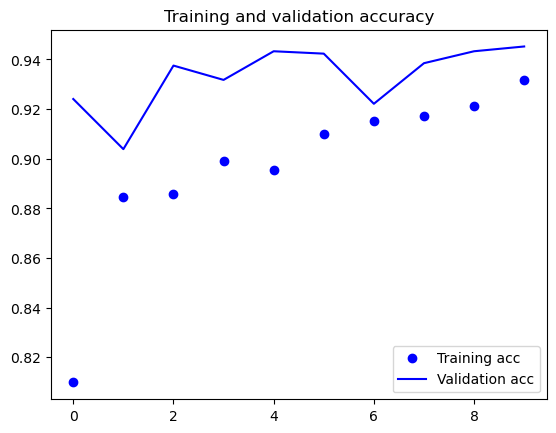

In [18]:
import matplotlib.pyplot as plt

acc = history_DA.history['acc']
val_acc = history_DA.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

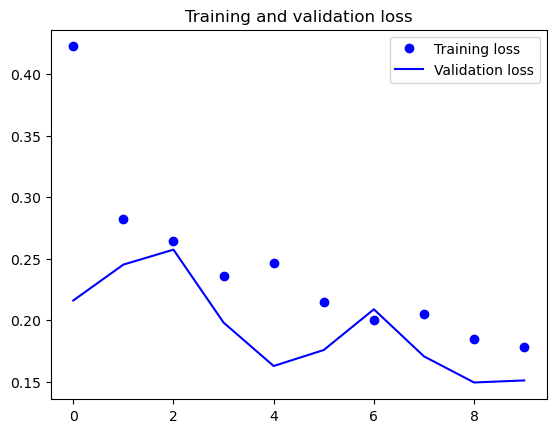

In [19]:
loss = history_DA.history['loss']
val_loss = history_DA.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
test_loss, test_acc = model_DA.evaluate(test)

20/20 [==============================] - 8s 377ms/step - loss: 0.3199 - acc: 0.8734


# Transfer Learning

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

batch_size = 32
datagen = ImageDataGenerator(rescale = 1/255,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.05,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')


train = datagen.flow_from_directory('C:/Users/Xhensil/Downloads/archive(2)/chest_xray/train', batch_size=batch_size, class_mode='binary')
val_gen = ImageDataGenerator(rescale = 1/255)
val = val_gen.flow_from_directory('C:/Users/Xhensil/Downloads/archive(2)/chest_xray/val', batch_size=batch_size, class_mode='binary')
test_gen = ImageDataGenerator(rescale = 1/255)
test = test_gen.flow_from_directory('C:/Users/Xhensil/Downloads/archive(2)/chest_xray/test', batch_size=batch_size, class_mode='binary')

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [23]:
model_TL = models.Sequential()
model_TL.add(conv_base)
model_TL.add(layers.Flatten())
model_TL.add(layers.Dense(512, activation='relu'))
model_TL.add(layers.Dropout(0.4))
model_TL.add(layers.Dense(1, activation='sigmoid'))

model_TL.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,492,929
Trainable params: 31,492,929
Non-trainable params: 0
_________________________________________________________________


In [24]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_TL.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [25]:
conv_base.trainable = False

In [26]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_TL.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4


In [27]:
model_TL.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_TL = model_TL.fit(train,
          epochs=10,
          validation_data=(val))

Epoch 1/10
66/66 [==============================] - 137s 2s/step - loss: 5.7719 - accuracy: 0.8721 - val_loss: 0.1235 - val_accuracy: 0.9644
Epoch 2/10
66/66 [==============================] - 126s 2s/step - loss: 0.1441 - accuracy: 0.9401 - val_loss: 0.0964 - val_accuracy: 0.9702
Epoch 3/10
66/66 [==============================] - 126s 2s/step - loss: 0.1399 - accuracy: 0.9463 - val_loss: 0.0765 - val_accuracy: 0.9779
Epoch 4/10
66/66 [==============================] - 126s 2s/step - loss: 0.1158 - accuracy: 0.9549 - val_loss: 0.1040 - val_accuracy: 0.9683
Epoch 5/10
66/66 [==============================] - 126s 2s/step - loss: 0.1061 - accuracy: 0.9583 - val_loss: 0.0875 - val_accuracy: 0.9779
Epoch 6/10
66/66 [==============================] - 126s 2s/step - loss: 0.1091 - accuracy: 0.9594 - val_loss: 0.0702 - val_accuracy: 0.9760
Epoch 7/10
66/66 [==============================] - 126s 2s/step - loss: 0.0873 - accuracy: 0.9654 - val_loss: 0.0865 - val_accuracy: 0.9692
Epoch 8/10
66

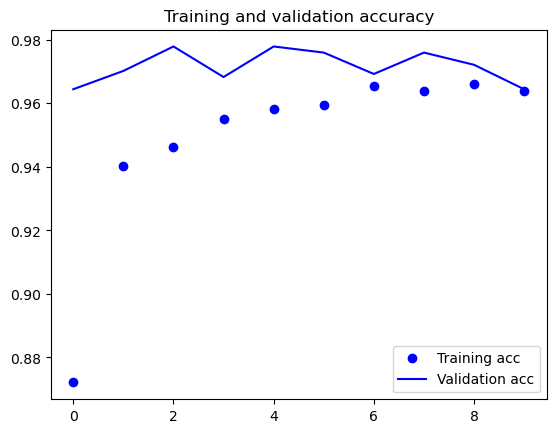

In [28]:
import matplotlib.pyplot as plt

acc = history_TL.history['accuracy']
val_acc = history_TL.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

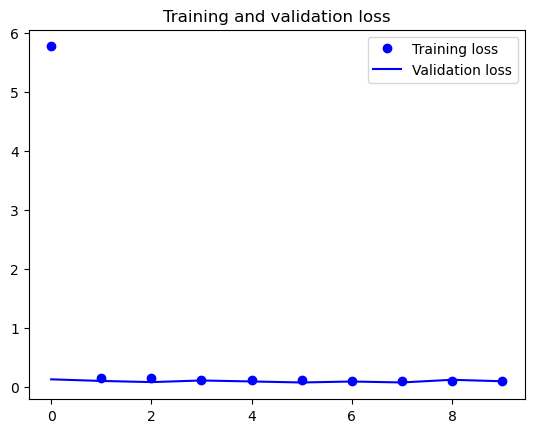

In [29]:
loss = history_TL.history['loss']
val_loss = history_TL.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
test_loss, test_acc = model_TL.evaluate(test)

10/10 [==============================] - 14s 1s/step - loss: 0.3148 - accuracy: 0.9199


In [32]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model_TL.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,492,929
Trainable params: 23,857,665
Non-trainable params: 7,635,264
_________________________________________________________________


In [33]:
model_TL.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_FT = model_TL.fit(train,
          epochs=10,
          # steps_per_epoch=100, # Run same number of steps we would if we were not using a generator.
          validation_data=(val))

Epoch 1/10
66/66 [==============================] - 129s 2s/step - loss: 0.0919 - accuracy: 0.9688 - val_loss: 0.0645 - val_accuracy: 0.9760
Epoch 2/10
66/66 [==============================] - 125s 2s/step - loss: 0.0742 - accuracy: 0.9742 - val_loss: 0.1274 - val_accuracy: 0.9577
Epoch 3/10
66/66 [==============================] - 125s 2s/step - loss: 0.0729 - accuracy: 0.9716 - val_loss: 0.1069 - val_accuracy: 0.9644
Epoch 4/10
66/66 [==============================] - 127s 2s/step - loss: 0.0637 - accuracy: 0.9790 - val_loss: 0.4936 - val_accuracy: 0.8500
Epoch 5/10
66/66 [==============================] - 125s 2s/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.1228 - val_accuracy: 0.9596
Epoch 6/10
66/66 [==============================] - 125s 2s/step - loss: 0.0451 - accuracy: 0.9845 - val_loss: 0.1269 - val_accuracy: 0.9654
Epoch 7/10
66/66 [==============================] - 126s 2s/step - loss: 0.0464 - accuracy: 0.9840 - val_loss: 0.1258 - val_accuracy: 0.9625
Epoch 8/10
66

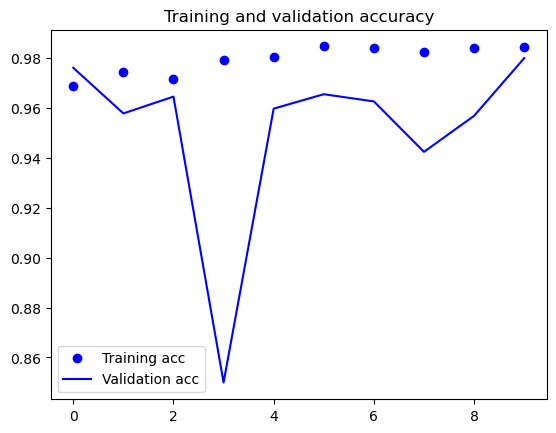

In [34]:
import matplotlib.pyplot as plt

acc = history_FT.history['accuracy']
val_acc = history_FT.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

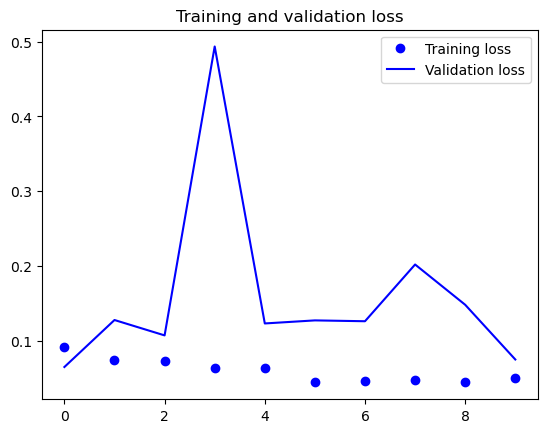

In [35]:
loss = history_FT.history['loss']
val_loss = history_FT.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
test_loss, test_acc = model_TL.evaluate(test)

10/10 [==============================] - 9s 925ms/step - loss: 0.3591 - accuracy: 0.9199


In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Make predictions on the batches of images
y_pred = model_TL.predict_generator(test)

# Convert predicted probabilities to predicted labels
y_pred_labels = np.where(y_pred > 0.5, 1, 0)

# Get true labels
y_true_labels = test.classes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


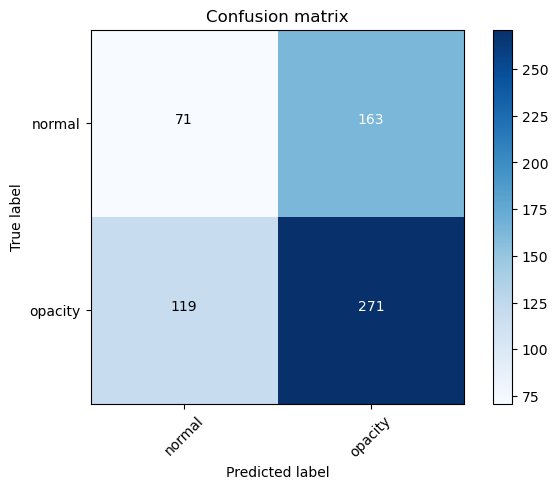

In [49]:
import matplotlib.pyplot as plt
import itertools

# Define the classes
classes = ['normal', 'opacity']

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes)
plt.show()


In [38]:
# CNN model
acc2=history_CNN.history['acc'][-1]
vacc2=history_CNN.history['val_acc'][-1]
loss2=history_CNN.history['loss'][-2]
vloss2=history_CNN.history['val_loss'][-2]

# Data Augmentation
acc3=history_DA.history['acc'][-1]
vacc3=history_DA.history['val_acc'][-1]
loss3=history_DA.history['loss'][-2]
vloss3=history_DA.history['val_loss'][-2]

# ResNet50
acc4=history_TL.history['accuracy'][-1]
vacc4=history_TL.history['val_accuracy'][-1]
loss4=history_TL.history['loss'][-2]
vloss4=history_TL.history['val_loss'][-2]

# ResNet50 Fine Tune
acc5=history_FT.history['accuracy'][-1]
vacc5=history_FT.history['val_accuracy'][-1]
loss5=history_FT.history['loss'][-2]
vloss5=history_FT.history['val_loss'][-2]

In [39]:
results = pd.DataFrame([["CNN",acc2*100,vacc2*100,loss2,vloss2],
                       ["CNN_data_augmentation",acc3*100,vacc3*100,loss3,vloss3],
                       ["Transfer Learning model",acc4*100,vacc4*100,loss4,vloss4],
                       ["Transfer Learning model_FT",acc5*100,vacc5*100,loss5,vloss5]],
                       columns = ["Model","Training Accuracy %","Validation Accuracy %", 'Loss', 'Validation Loss'])
results

,Model,Training Accuracy %,Validation Accuracy %,Loss,Validation Loss
0,CNN,98.759544,97.307694,0.027386,0.050128
1,CNN_data_augmentation,93.153626,94.519234,0.184610,0.149308
2,Transfer Learning model,96.374047,96.442306,0.087022,0.115681
3,Transfer Learning model_FT,98.425573,97.980767,0.043833,0.147835
